### Dataset

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
boston = datasets.load_boston()
x, y = boston.data[:, 1:3], boston.target # Spalten 1, 2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

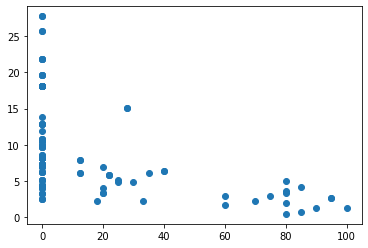

Min: [0.   0.46]
Max: [100.    27.74]
Mean: [11.26973684 11.14546053]
Std: [24.90150872  6.67496628]


In [5]:
plt.scatter(x_test[:, 0], x_test[:, 1])
plt.show()

print(f"Min: {np.min(x_test, axis=0)}")
print(f"Max: {np.max(x_test, axis=0)}")
print(f"Mean: {np.mean(x_test, axis=0)}")
print(f"Std: {np.std(x_test, axis=0)}")

### MinMax Scaler

$x' = \frac{x - min}{max-min}$

In [10]:
class MinMaxScaler:
    def __init__(self):
        self.data_min: np.ndarray = None
        self.data_max: np.ndarray = None
        
    def fit(self, x: np.ndarray):
        self.data_min = np.min(x, axis=0)
        self.data_max = np.max(x, axis=0)
        
    def transform(self, x: np.ndarray):
        x_transformed = (x - self.data_min) / (self.data_max - self.data_min)
        return x_transformed

In [11]:
scaler = MinMaxScaler()
scaler.fit(x_train) # Nur auf Trainingsdaten
x_train_transformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)

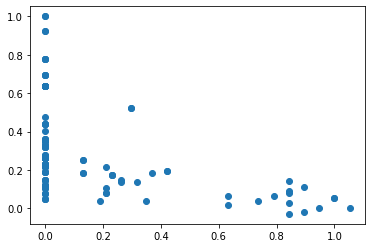

Min: [ 0.         -0.02826988]
Max: [1.05263158 1.        ]
Mean: [0.11862881 0.37449908]
Std: [0.26212114 0.25160069]


In [12]:
plt.scatter(x_test_transformed[:, 0], x_test_transformed[:, 1])
plt.show()

print(f"Min: {np.min(x_test_transformed, axis=0)}")
print(f"Max: {np.max(x_test_transformed, axis=0)}")
print(f"Mean: {np.mean(x_test_transformed, axis=0)}")
print(f"Std: {np.std(x_test_transformed, axis=0)}")